In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import joblib
import re 

C:\Users\Josh\Desktop\Machine_learning\env\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Josh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Josh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Josh\AppData\Roaming\nltk_data...


True

In [3]:
path_directory = './Gender Based Violence/'

# 1. Reading the data 

In [4]:
train = pd.read_csv(path_directory + 'spam.csv')

# 2. Data visualisation

In [5]:
display(train.head(),train.shape)

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


(5796, 2)

In [6]:
train.target.value_counts()

target
0    3900
1    1896
Name: count, dtype: int64

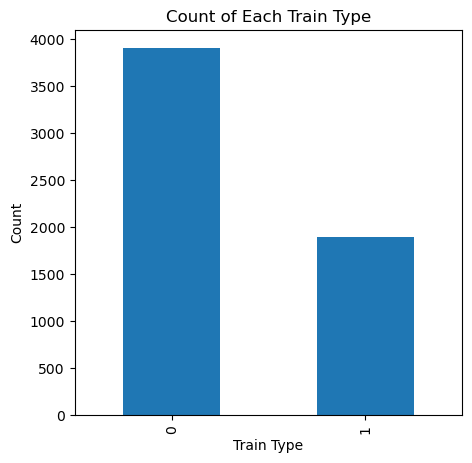

In [7]:
# Assuming 'train' is your DataFrame and 'type' is the column you're interested in
counts = train['target'].value_counts()

# Create a bar chart
plt.figure(figsize=(5, 5))
counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Train Type')
plt.ylabel('Count')
plt.title('Count of Each Train Type')

# Show the plot
plt.show()

In [8]:
# import warnings 
# warnings.filterwarnings('ignore')
# train.type.replace('sexual_violence', 1, inplace=True)
# train.type.replace('Physical_violence', 2, inplace=True)
# train.type.replace('emotional_violence', 3, inplace=True)
# train.type.replace('economic_violence', 4, inplace=True)
# train.type.replace('Harmful_Traditional_practice', 5, inplace=True)

# 3. Data cleaning

> Clean dataset reviews as following:
> 1. Remove HTML tags
2. Remove special characters
3. Convert everything to lowercase
4. Remove stopwords
5. Stemming

In [9]:
# 3.1 Remove HTML tags
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

In [10]:
# 3.2 Remove special characters
def is_special(text):
    my_text = ''
    for i in text:
        if i.isalnum():
            my_text = my_text + i
        else:
            my_text = my_text + ' '
    return my_text

In [11]:
# 3.3 Convert everything to lowercase
def to_lower(text):
    return text.lower()

In [12]:
#3.4 Remove stopwords
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

In [13]:
# # 3.5 Stem the words
# def stem_txt(text):
#     ss = SnowballStemmer('english')
#     return " ".join([ss.stem(w) for w in text])



def stem_txt(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(w) for w in text])


In [14]:
train.text = train.text.apply(clean)
print(f"1. Review sample after removing HTML tags : \n{train.text[0]}\n")

train.text = train.text.apply(is_special)
print(f"2. Review sample after removing special characters : \n{train.text[0]}\n")

train.text = train.text.apply(to_lower)
print(f"3. Review sample after converting everything to lowercase : \n{train.text[0]}\n")

train.text = train.text.apply(rem_stopwords)
print(f"4. Review sample after removing stopwords : \n{train.text[0]}\n")

train.text = train.text.apply(stem_txt)
print(f"5. Review sample after stemming the words : \n{train.text[0]}\n")

1. Review sample after removing HTML tags : 
From ilug-admin@linux.ie Mon Jul 29 11:28:02 2002 Return-Path:  Delivered-To: yyyy@localhost.netnoteinc.com Received: from localhost (localhost [127.0.0.1]) by phobos.labs.netnoteinc.com (Postfix) with ESMTP id A13D94414F for ; Mon, 29 Jul 2002 06:25:11 -0400 (EDT) Received: from phobos [127.0.0.1] by localhost with IMAP (fetchmail-5.9.0) for jm@localhost (single-drop); Mon, 29 Jul 2002 11:25:11 +0100 (IST) Received: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g6RHn7i17130 for ; Sat, 27 Jul 2002 18:49:07 +0100 Received: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id SAA25016; Sat, 27 Jul 2002 18:45:03 +0100 X-Authentication-Warning: lugh.tuatha.org: Host root@localhost [127.0.0.1] claimed to be lugh Received: from mail1.mail.iol.ie (mail1.mail.iol.ie [194.125.2.192]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id SAA24977 for ; Sat, 2

In [15]:
# 3.1 Creating Bag Of Words (BOW)
X = np.array(train.iloc[:,0].values)
y = np.array(train.target.values)

cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(train.text).toarray()

# tfidf_vectorizer = TfidfVectorizer(max_features = 1500)
# X = tfidf_vectorizer.fit_transform(X)

print(f"=== Bag of words ===\n")
print(f"BOW X shape : {X.shape}")
print(f"BOW y shape : {y.shape}\n")

=== Bag of words ===

BOW X shape : (5796, 2000)
BOW y shape : (5796,)



In [16]:
y[:50]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [17]:
# 3.2 Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
print(f"Train shapes : X = {X_train.shape}, y = {y_train.shape}")
print(f"Test shapes  : X = {X_test.shape},  y = {y_test.shape}\n")

Train shapes : X = (4636, 2000), y = (4636,)
Test shapes  : X = (1160, 2000),  y = (1160,)



In [18]:
from sklearn.ensemble import RandomForestClassifier
# 3.3 Defining the models and Training them
gnb, mnb, bnb, rf = GaussianNB(), MultinomialNB(alpha=1.0,fit_prior=True), BernoulliNB(alpha=1.0,fit_prior=True),RandomForestClassifier()
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
joblib.dump(gnb, "Models/MRSA_gnb.pkl")
joblib.dump(mnb, "Models/MRSA_mnb.pkl")
joblib.dump(bnb, "Models/MRSA_bnb.pkl")
joblib.dump(bnb, "Models/MRSA_rf.pkl")

['Models/MRSA_rf.pkl']

In [20]:
# 3.5 Make predictions
ypg = gnb.predict(X_test)
ypm = mnb.predict(X_test)
ypb = bnb.predict(X_test)
yrf = rf.predict(X_test)

## 4 | Model Evaluation ##
"""Evaluate model performance"""
print(f"Gaussian accuracy    =  {round(accuracy_score(y_test, ypg), 2)*100:.2f} %")
print(f"Multinomial accuracy =  {round(accuracy_score(y_test, ypm), 2)*100:.2f} %")
print(f"Bernoulli accuracy   =  {round(accuracy_score(y_test, ypb), 2)*100:.2f} %")
print(f"Random Forest   =  {round(accuracy_score(y_test, yrf), 2)*100:.2f} %")

Gaussian accuracy    =  99.00 %
Multinomial accuracy =  98.00 %
Bernoulli accuracy   =  97.00 %
Random Forest   =  100.00 %


In [34]:
tweet =  """
Subject: Win a FREE iPad!

Congratulations! You have been selected to win a FREE iPad!

To claim your prize, please click on the link below and follow the instructions:

[CLICK HERE TO CLAIM YOUR PRIZE](http://www.fakewebsite.com/claim-prize)

Don't miss out on this amazing opportunity!

Best Regards,

The Free Prize Team

"""

tweet =  """

Subject: Meeting Agenda for Tomorrow

Hi Team,

I hope this email finds you well. I wanted to share the agenda for our meeting tomorrow at 10 AM.

1. Project Status Updates
   - John will present the latest progress on the marketing campaign.
   - Sarah will provide an update on the financial projections.

2. Discussion on New Client Proposal
   - We will review the proposal for the new client and discuss any potential risks or opportunities.

3. Action Items
   - Jane will follow up with the IT department regarding the new software installation.
   - Mike will schedule a call with the potential new vendor for next week.

Please make sure to bring any relevant documents or data to the meeting.

Looking forward to seeing you all tomorrow.

Best Regards,

Bwenge kyangi


"""

In [42]:
train.loc[train.te]

KeyError: 'key of type tuple not found and not a MultiIndex'

In [35]:
f1 = clean(tweet)
f2 = is_special(f1)
f3 = to_lower(f2)
f4 = rem_stopwords(f3)
f5 = stem_txt(f4)

In [36]:
f5

'subject meeting agenda tomorrow hi team hope email find well wanted share agenda meeting tomorrow 10 1 project status update john present latest progress marketing campaign sarah provide update financial projection 2 discussion new client proposal review proposal new client discus potential risk opportunity 3 action item jane follow department regarding new software installation mike schedule call potential new vendor next week please make sure bring relevant document data meeting looking forward seeing tomorrow best regard bwenge kyangi'

In [37]:
import pickle
bow,words = [],word_tokenize(f5)
for word in words:
    bow.append(words.count(word))
#np.array(bow).reshape(1,3000)
#bow.shape
word_dict = cv.vocabulary_
pickle.dump(word_dict,open('bow.pkl','wb'))

In [38]:
inp = []
for i in word_dict:
    inp.append(f5.count(i[0]))
y_pred = bnb.predict(np.array(inp).reshape(1,2000))

print(y_pred)

[1]


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
